**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be first graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). However, any given item may be worth 4 or 8 points; if an item is worth 8 points, you need to accordingly scale the 0-4 grade.


The total score must be re-scaled to 100. That should apply to all future assignments so that Canvas assigns the same weight on all assignments. 



# Assignment 2



### Preparation Steps




We will work with this [mystery dataset](https://drive.google.com/open?id=1W3oWk0_y-g6eFzYXotmLiOE46S1tfkL4&authuser=ikoutis%40njit.edu&usp=drive_fs) that you can download and place to your google drive. You can then put it somewhere on your google drive and bring it into your Colab by following the steps in the following cell. 



In [ ]:
!pip install d2l==0.16.1
!pip install torch-optim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch 
import torch.nn.functional as F
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from d2l import torch as d2l
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, TensorDataset
from torchopt import utils

In [ ]:
# Import dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import scipy.io

# Mount dataset
mat = scipy.io.loadmat('/content/gdrive/MyDrive/mysteryDataset.mat')

Mounted at /content/gdrive


In [ ]:
# Checking to see X loaded
mat.get('X')

array([[-1.17172086e-05, -7.25280867e-06,  5.12661752e-06, ...,
         1.70093676e-05,  7.50423711e-06, -4.17924402e-06],
       [-1.11324893e-05, -4.08813759e-06,  2.02800221e-06, ...,
         2.45011219e-05, -2.71210886e-05, -2.85269672e-04],
       [-1.15048231e-05, -5.82459697e-06,  4.93125101e-06, ...,
         3.37573241e-05,  1.78887911e-05,  6.14671185e-05],
       ...,
       [-1.14174907e-05, -6.78472981e-06,  5.12786880e-06, ...,
         1.16537868e-05,  6.25054001e-06, -2.89840892e-05],
       [-1.17641029e-05, -7.40347110e-06,  5.22326732e-06, ...,
         2.08183710e-05,  8.13903339e-06, -4.64360505e-06],
       [-1.16459906e-05, -4.51781688e-06,  4.84513313e-06, ...,
        -3.50333767e-05,  3.68047036e-06,  1.20300889e-04]])

The file contains 

* Two matrices $X$ and $X_1$ of numerical features. These datasets have the same dimensions (196343x128) but they are different. 
* An array $y$ of labels, ranging from 0-39. 
* The indices $otrain$ of a training set. These indices tell you what rows of the arrays $X,X_1,y$ correspond to the training points. You can use these to make two different training sets $(X[train], y[train])$ and $(X_1[train], y[train])$
* Similarly, it contains the indexes for a validation and a test set, $ovalid$ and $otest$ respectively. 

The following cell shows how to access these arrays and assign them to local numpy objects. 

In [ ]:
# this is an example
#ft = mat.get('x')

## <font color = 'blue'> Question 1. Import the dataset and conver to torch tensors </font>

Your task for this question is to adapt the above preparation steps, import all mentioned variables into numpy arrays, and then transform them to PyTorch tensors. 


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# Load data as numpy arrays
X = mat['X']
X1 = mat['X1']
y = mat['y']
train_indices = mat['otrain']
val_indices = mat['ovalid']
test_indices = mat['otest']

In [ ]:
# Split into train, validation, and tests sets by indices
X_train, y_train = X[train_indices[0]], y[train_indices[0]]
X_valid, y_valid = X[val_indices[0]], y[val_indices[0]]
X_test, y_test = X[test_indices[0]], y[test_indices[0]]

# Print the shapes
print("X_train, y_train shape: {}".format(X_train.shape, y_train.shape))
print("X_valid shape, y_valid shape: {}".format(X_valid.shape, y_valid.shape))
print("X_test shape, y_test shape: {}".format(X_test.shape, y_test.shape))
del X
del y

X1_train = X1[train_indices[0]]
X1_valid = X1[val_indices[0]]
X1_test = X1[test_indices[0]]

print("X1_train shape: {}".format(X1_train.shape))
print("X1_valid shape: {}".format(X1_valid.shape))
print("X1_test shape: {}".format(X1_test.shape))
del X1

X_train, y_train shape: (90941, 200)
X_valid shape, y_valid shape: (29799, 200)
X_test shape, y_test shape: (48603, 200)
X1_train shape: (90941, 128)
X1_valid shape: (29799, 128)
X1_test shape: (48603, 128)


In [ ]:
# Storing tensors in single precision fp32 and the labels long tensor
X_train_tensor, y_train_tensor = torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(y_train).type(torch.LongTensor)
X_val_tensor, y_val_tensor = torch.from_numpy(X_valid).type(torch.float32), torch.from_numpy(y_valid).type(torch.LongTensor)
X_test_tensor, y_test_tensor = torch.from_numpy(X_test).type(torch.float32), torch.from_numpy(y_test).type(torch.LongTensor)

X1_train_tensor, y_train_tensor = torch.from_numpy(X1_train).type(torch.float32), torch.from_numpy(y_train).type(torch.LongTensor)
X1_val_tensor, y_val_tensor = torch.from_numpy(X1_valid).type(torch.float32), torch.from_numpy(y_valid).type(torch.LongTensor)
X1_test_tensor, y_test_tensor = torch.from_numpy(X1_test).type(torch.float32), torch.from_numpy(y_test).type(torch.LongTensor)

del X_train 
del X1_train 
del y_train 

del X_valid 
del X1_valid 
del y_valid 

del X_test
del X1_test 
del y_test

In [ ]:
# Setup torch datasets as tensor datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train1_dataset = TensorDataset(X1_train_tensor, y_train_tensor)
val1_dataset = TensorDataset(X1_val_tensor, y_val_tensor)
test1_dataset = TensorDataset(X1_test_tensor, y_test_tensor)

In [ ]:
# Setup dataloaders
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=32)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

train1_loader = DataLoader(train1_dataset, shuffle=True, batch_size=32)
val1_loader = DataLoader(val1_dataset, batch_size=32)
test1_loader = DataLoader(test1_dataset, batch_size=32)

In [ ]:
# for grader use only

# insert grade here  (out of 4)

# G[1] = 
#
# please justify point subtractions when needed

## <font color = 'blue'> Question 2. Write a functioning classifier in PyTorch </font>

Write code that defines a classification model for the above dataset, and all other functions that are needed for its training. Apply your model on the two datsets $X,X_1$ and report the accuracy. The classifier should operate on the GPU. 

**Hint:** Re-use code we discussed for the Softmax Regression module. 

In [ ]:
# Building classification model
def init_model(module):
  if type(module) == nn.LazyLinear:
    nn.init.xavier_uniform_(module.weight)

def accuracy(y_hat, y, averaged=True):
  y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
  preds = y_hat.argmax(axis=1).type(y.dtype)
  compare = (preds == y.reshape(-1)).type(torch.float32)
  return compare.mean() if averaged else compare

class SoftmaxRegression(nn.Module):
  def __init__(self, num_inputs: int, num_classes: int):
    super().__init__()
    self.net = nn.Sequential(
        nn.LazyLinear(num_inputs, num_classes),
        nn.ReLU(),
    )

  def forward(self, X):
    return self.net(X)

In [ ]:
# Apply model for X
epochs = 10
lr = 0.01
num_classes = len(y_train_tensor.unique())
model1 = SoftmaxRegression(num_inputs=200, num_classes=num_classes)
model1

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


SoftmaxRegression(
  (net): Sequential(
    (0): LazyLinear(in_features=0, out_features=200, bias=True)
    (1): ReLU()
  )
)

In [ ]:
# Init weights
for x_batch, y_batch in train_loader:
  print(x_batch.shape)
  _ = model1(x_batch)
  break
  
model1.apply(init_model)

torch.Size([32, 200])


SoftmaxRegression(
  (net): Sequential(
    (0): Linear(in_features=200, out_features=200, bias=True)
    (1): ReLU()
  )
)

In [ ]:
# Training set framework
def train_model(model, loss_fn, optimizer, train_loader, val_loader, epochs=10):
  """
  Train model
  """
  model.to(device)
  train_losses, val_losses = [], []
  for epoch in range(epochs):
    train_samples = 0
    train_acc = 0.0
    train_loss = []
    for x_batch, y_batch in train_loader:
      model.train()
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      yhat = model(x_batch)
      loss = loss_fn(yhat, y_batch.view(-1))
      loss.backward()
      train_loss.append(loss.item())
      optimizer.step()
      optimizer.zero_grad()

      train_samples += y_batch.shape[0]
      train_acc += accuracy(yhat, y_batch)

    # Add training loss for epoch
    train_losses.append(np.mean(train_loss))

    # Validation loop
    with torch.no_grad():
      val_samples = 0
      val_acc = 0.0
      val_loss = []
      for x_batch, y_batch in val_loader:
        model.eval()
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        yhat = model(x_batch)
        loss = loss_fn(yhat, y_batch.view(-1))
        val_loss.append(loss.item())
        val_samples += y_batch.shape[0]
        val_acc += accuracy(yhat, y_batch)
    val_losses.append(np.mean(val_loss))

    if epoch % 2 == 0:
      print(f"Epoch {epoch} train accuracy: {100.0*train_acc/train_samples:0.3f}, validation accuracy: {100.0*val_acc/val_samples:0.3f}")

  return model, train_losses, val_losses

Epoch 0 train accuracy: 0.554, validation accuracy: 0.239
Epoch 2 train accuracy: 0.560, validation accuracy: 0.239
Epoch 4 train accuracy: 0.560, validation accuracy: 0.239
Epoch 6 train accuracy: 0.560, validation accuracy: 0.239
Epoch 8 train accuracy: 0.560, validation accuracy: 0.239


<function matplotlib.pyplot.show(*args, **kw)>

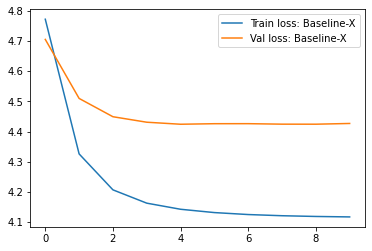

In [ ]:
# Baseline X dataset model results
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=lr)
model1, train_losses, val_losses = train_model(model1, loss_fn, optimizer, train_loader, val_loader, epochs)
torch.save(model1.state_dict(), "Baseline-X.pt")

plt.plot(train_losses, label = 'Train loss: Baseline-X')
plt.plot(val_losses, label = 'Val loss: Baseline-X')
plt.legend()
plt.show

In [ ]:
# Baseline X1 dataset model
model2 = SoftmaxRegression(num_inputs=128, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train1_loader:
  _ = model2(x_batch)
  break

model2.apply(init_model)

SoftmaxRegression(
  (net): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
)

Epoch 0 train accuracy: 0.589, validation accuracy: 0.775
Epoch 2 train accuracy: 0.978, validation accuracy: 1.097
Epoch 4 train accuracy: 1.161, validation accuracy: 1.258
Epoch 6 train accuracy: 1.253, validation accuracy: 1.359
Epoch 8 train accuracy: 1.306, validation accuracy: 1.421


<function matplotlib.pyplot.show(*args, **kw)>

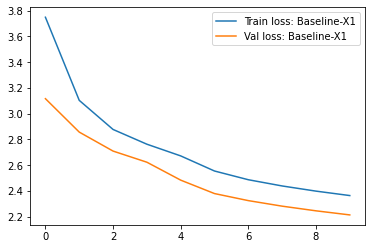

In [ ]:
# Show X1 dataset model results
optimizer2 = torch.optim.SGD(model2.parameters(), lr=lr)
model2, train_losses2, val_losses2 = train_model(model2, loss_fn, optimizer2, train1_loader, val1_loader, epochs)
torch.save(model2.state_dict(), "Baseline-X1.pt")

plt.plot(train_losses2, label = 'Train loss: Baseline-X1')
plt.plot(val_losses2, label = 'Val loss: Baseline-X1')
plt.legend()
plt.show

In [ ]:
# for grader use only

# insert grade here  (out of 8)

# G[2] = 
#
# please justify point subtractions when needed

## <font color = 'blue'> Question 3. Maximize the accuracy on the two datasets </font>

Augment your classifier from Question-2 with any number and type of layers you want, with the goal to maximize the **validation** accuracy you achieve on the two datasets. Feel free to use any stopping criterion you want for the training process. The networks for $X$ and $X_1$ do not have be of the same architecture. 

Show your code, and add a text cell summarizing your idea and findings. Finally apply your models to the **test** set, and report the accuracy. Feel free to discuss your validation accuracy on Canvas. Also please avoid looking at the test set, until the very end. 

**Rubric**: All complete answers get 8 points, and the **top 5** test accuracies reported get an extra 10\% in the final quiz. 

In [ ]:
# Augmented architecture
class SoftmaxRegressionAug(nn.Module):
  def __init__(self, num_inputs: int, num_classes: int):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear = nn.Linear(num_inputs, num_classes)

  def forward(self, x):
    y = self.flatten(x)
    y = self.linear(y)
    return y

In [ ]:
# Augmented model for X
model3 = SoftmaxRegressionAug(num_inputs=200, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train_loader:
  _ = model3(x_batch)
  break

model3.apply(init_model)

SoftmaxRegressionAug(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=200, out_features=40, bias=True)
)

Epoch 0 train accuracy: 0.560, validation accuracy: 0.239
Epoch 2 train accuracy: 0.600, validation accuracy: 0.266
Epoch 4 train accuracy: 0.713, validation accuracy: 0.306
Epoch 6 train accuracy: 0.882, validation accuracy: 1.025
Epoch 8 train accuracy: 1.143, validation accuracy: 1.061


<function matplotlib.pyplot.show(*args, **kw)>

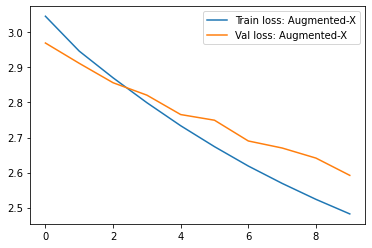

In [ ]:
# Show Augmented X model results
optimizer3 = torch.optim.Adam(model3.parameters(), lr=lr)
model3, train_losses3, val_losses3 = train_model(model3, loss_fn, optimizer3, train_loader, val_loader, epochs)
torch.save(model3.state_dict(), "Augmented-X.pt")

plt.plot(train_losses3, label = 'Train loss: Augmented-X')
plt.plot(val_losses3, label = 'Val loss: Augmented-X')
plt.legend()
plt.show

In [ ]:
# Augmented X1 model
model4 = SoftmaxRegressionAug(num_inputs=128, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train1_loader:
  _ = model4(x_batch)
  break

model4.apply(init_model)

SoftmaxRegressionAug(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=128, out_features=40, bias=True)
)

Epoch 0 train accuracy: 1.549, validation accuracy: 1.673
Epoch 2 train accuracy: 1.662, validation accuracy: 1.649
Epoch 4 train accuracy: 1.673, validation accuracy: 1.689
Epoch 6 train accuracy: 1.674, validation accuracy: 1.698
Epoch 8 train accuracy: 1.674, validation accuracy: 1.698


<function matplotlib.pyplot.show(*args, **kw)>

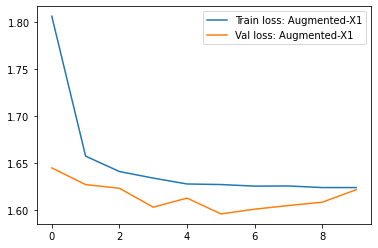

In [ ]:
# Show Augmented X1 model results
optimizer4 = torch.optim.Adam(model4.parameters(), lr=lr)
model4, train_losses4, val_losses4 = train_model(model4, loss_fn, optimizer4, train1_loader, val1_loader, epochs)
torch.save(model4.state_dict(), "Augmented-X1.pt")

plt.plot(train_losses4, label = 'Train loss: Augmented-X1')
plt.plot(val_losses4, label = 'Val loss: Augmented-X1')
plt.legend()
plt.show

In [ ]:
# Optimized architecture, adding dropout
class SoftmaxRegressionOptimized(nn.Module):
  def __init__(self, num_inputs: int, num_classes: int):
    super().__init__()
    self.net = nn.Sequential(
        nn.Dropout(0.5),
        nn.LazyLinear(num_inputs, num_classes),
        nn.ReLU(),
    )

  def forward(self, X):
    return self.net(X)

In [ ]:
# Optimized X model
model5 = SoftmaxRegressionOptimized(num_inputs=200, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train_loader:
  _ = model5(x_batch)
  break

model5.apply(init_model)

SoftmaxRegressionOptimized(
  (net): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=200, out_features=200, bias=True)
    (2): ReLU()
  )
)

Epoch 0 train accuracy: 0.556, validation accuracy: 0.239
Epoch 2 train accuracy: 0.573, validation accuracy: 0.245
Epoch 4 train accuracy: 0.625, validation accuracy: 0.271
Epoch 6 train accuracy: 0.669, validation accuracy: 0.302
Epoch 8 train accuracy: 0.700, validation accuracy: 0.310


<function matplotlib.pyplot.show(*args, **kw)>

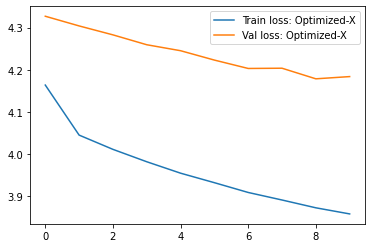

In [ ]:
# Show Optimized X model results
optimizer5 = torch.optim.Adam(model5.parameters(), lr=lr)
model5, train_losses5, val_losses5 = train_model(model5, loss_fn, optimizer5, train_loader, val_loader, epochs)
torch.save(model5.state_dict(), "Optimized-X.pt")

plt.plot(train_losses5, label = 'Train loss: Optimized-X')
plt.plot(val_losses5, label = 'Val loss: Optimized-X')
plt.legend()
plt.show

In [ ]:
# Optimized X1 model
model6 = SoftmaxRegressionOptimized(num_inputs=128, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train1_loader:
  _ = model6(x_batch)
  break

model6.apply(init_model)

SoftmaxRegressionOptimized(
  (net): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): ReLU()
  )
)

Epoch 0 train accuracy: 1.111, validation accuracy: 1.356
Epoch 2 train accuracy: 1.146, validation accuracy: 1.305
Epoch 4 train accuracy: 1.195, validation accuracy: 1.526
Epoch 6 train accuracy: 1.198, validation accuracy: 1.493
Epoch 8 train accuracy: 1.192, validation accuracy: 1.479


<function matplotlib.pyplot.show(*args, **kw)>

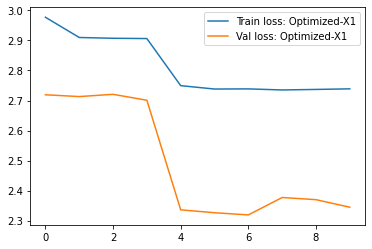

In [ ]:
# Show Optimized X1 model results
optimizer6 = torch.optim.Adam(model6.parameters(), lr=lr)
model6, train_losses6, val_losses6 = train_model(model6, loss_fn, optimizer6, train1_loader, val1_loader, epochs)
torch.save(model6.state_dict(), "Optimized-X1.pt")

plt.plot(train_losses6, label = 'Train loss: Optimized-X1')
plt.plot(val_losses6, label = 'Val loss: Optimized-X1')
plt.legend()
plt.show

#Evaluation of models on the test set

In [ ]:
# Testing model framework
def test_model(model, testdata_loader):
  with torch.no_grad():
    test_samples = 0
    test_acc = 0.0
    for x_batch, y_batch in testdata_loader:
      model.eval()
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      yhat = model(x_batch)
      test_samples += y_batch.shape[0]
      test_acc += accuracy(yhat, y_batch)
  print(f"Test accurcay: {100.0*test_acc/test_samples:0.3f}")

In [ ]:
# Baseline model on test set X
model1.load_state_dict(torch.load("Baseline-X.pt"))
model1.eval()
test_model(model1, test_loader)

Test accurcay: 0.183


In [ ]:
# Baseline model on test set X1
model2.load_state_dict(torch.load("Baseline-X1.pt"))
model2.eval()
test_model(model2, test1_loader)

Test accurcay: 1.371


In [ ]:
# Augment model on test set X
model3.load_state_dict(torch.load("Augmented-X.pt"))
model3.eval()
test_model(model3, test_loader)

Test accurcay: 0.959


In [ ]:
# Augmented model on test set X1
model4.load_state_dict(torch.load("Augmented-X1.pt"))
model4.eval()
test_model(model4, test1_loader)

Test accurcay: 1.620


In [ ]:
# Baseline model with Adam on test set X
model5.load_state_dict(torch.load("Optimized-X.pt"))
model5.eval()
test_model(model5, test_loader)

Test accurcay: 0.239


In [ ]:
# Baseline model with Adam on test set X1
model6.load_state_dict(torch.load("Optimized-X1.pt"))
model6.eval()
test_model(model6, test1_loader)

Test accurcay: 1.409


#Extended Baseline X and X1 models

In [ ]:
# Extended to maximize X accuracy
model7 = SoftmaxRegression(num_inputs=200, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train_loader:
  _ = model7(x_batch)
  break

model7.apply(init_model)

SoftmaxRegression(
  (net): Sequential(
    (0): Linear(in_features=200, out_features=200, bias=True)
    (1): ReLU()
  )
)

Epoch 0 train accuracy: 0.964, validation accuracy: 1.028
Epoch 2 train accuracy: 1.139, validation accuracy: 1.195
Epoch 4 train accuracy: 1.183, validation accuracy: 1.092
Epoch 6 train accuracy: 1.207, validation accuracy: 1.149
Epoch 8 train accuracy: 1.224, validation accuracy: 1.203


<function matplotlib.pyplot.show(*args, **kw)>

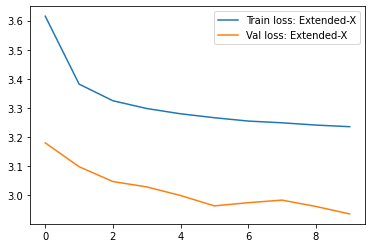

In [ ]:
# Initialize with higher lr
loss_fn = nn.CrossEntropyLoss()
optimizer7 = torch.optim.Adam(model7.parameters(), lr=0.1)
model7, train_losses7, val_losses7 = train_model(model7, loss_fn, optimizer7, train_loader, val_loader, epochs)
torch.save(model7.state_dict(), "Extended-X.pt")

plt.plot(train_losses7, label = 'Train loss: Extended-X')
plt.plot(val_losses7, label = 'Val loss: Extended-X')
plt.legend()
plt.show

In [ ]:
# Extended to maximize X1 accuracy
model8 = SoftmaxRegression(num_inputs=128, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train1_loader:
  _ = model8(x_batch)
  break

model8.apply(init_model)

SoftmaxRegression(
  (net): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
  )
)

Epoch 0 train accuracy: 0.195, validation accuracy: 0.008
Epoch 2 train accuracy: 0.025, validation accuracy: 0.026
Epoch 4 train accuracy: 0.019, validation accuracy: 0.010
Epoch 6 train accuracy: 0.020, validation accuracy: 0.009
Epoch 8 train accuracy: 0.016, validation accuracy: 0.008


<function matplotlib.pyplot.show(*args, **kw)>

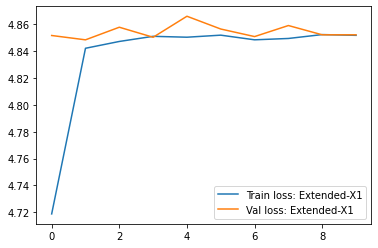

In [ ]:
# Initialize with higher lr
loss_fn = nn.CrossEntropyLoss()
optimizer8 = torch.optim.Adam(model8.parameters(), lr=0.1)
model8, train_losses8, val_losses8 = train_model(model8, loss_fn, optimizer8, train1_loader, val1_loader, epochs)
torch.save(model8.state_dict(), "Extended-X1.pt")

plt.plot(train_losses8, label = 'Train loss: Extended-X1')
plt.plot(val_losses8, label = 'Val loss: Extended-X1')
plt.legend()
plt.show

#Extended Augmented X and X1

In [ ]:
# Extended training for X
model9 = SoftmaxRegressionAug(num_inputs=200, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train_loader:
  _ = model9(x_batch)
  break

model9.apply(init_model)

SoftmaxRegressionAug(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=200, out_features=40, bias=True)
)

Epoch 0 train accuracy: 1.172, validation accuracy: 0.900
Epoch 2 train accuracy: 1.439, validation accuracy: 1.210
Epoch 4 train accuracy: 1.505, validation accuracy: 1.320
Epoch 6 train accuracy: 1.552, validation accuracy: 1.369
Epoch 8 train accuracy: 1.584, validation accuracy: 1.332


<function matplotlib.pyplot.show(*args, **kw)>

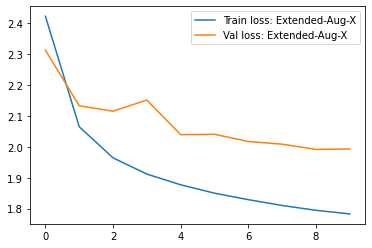

In [ ]:
# Initialize with higher lr
loss_fn = nn.CrossEntropyLoss()
optimizer9 = torch.optim.Adam(model9.parameters(), lr=0.1)
model9, train_losses9, val_losses9 = train_model(model9, loss_fn, optimizer9, train_loader, val_loader, epochs)
torch.save(model9.state_dict(), "Extended-Aug-X.pt")

plt.plot(train_losses9, label = 'Train loss: Extended-Aug-X')
plt.plot(val_losses9, label = 'Val loss: Extended-Aug-X')
plt.legend()
plt.show

In [ ]:
# Extended training for X1
model10 = SoftmaxRegressionAug(num_inputs=128, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train1_loader:
  _ = model10(x_batch)
  break

model10.apply(init_model)

SoftmaxRegressionAug(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=128, out_features=40, bias=True)
)

Epoch 0 train accuracy: 1.233, validation accuracy: 1.360
Epoch 2 train accuracy: 1.251, validation accuracy: 1.031
Epoch 4 train accuracy: 1.260, validation accuracy: 1.289
Epoch 6 train accuracy: 1.262, validation accuracy: 1.098
Epoch 8 train accuracy: 1.258, validation accuracy: 1.095


<function matplotlib.pyplot.show(*args, **kw)>

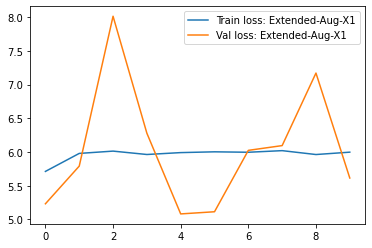

In [ ]:
# Initialize with higher lr
loss_fn = nn.CrossEntropyLoss()
optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.1)
model10, train_losses10, val_losses10 = train_model(model10, loss_fn, optimizer10, train1_loader, val1_loader, epochs)
torch.save(model10.state_dict(), "Extended-Aug-X1.pt")

plt.plot(train_losses10, label = 'Train loss: Extended-Aug-X1')
plt.plot(val_losses10, label = 'Val loss: Extended-Aug-X1')
plt.legend()
plt.show

#Extended Training to maximize results for Optimized X and X1

In [ ]:
# Extended training for X
model11 = SoftmaxRegressionOptimized(num_inputs=200, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train_loader:
  _ = model11(x_batch)
  break

model11.apply(init_model)

SoftmaxRegressionOptimized(
  (net): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=200, out_features=200, bias=True)
    (2): ReLU()
  )
)

Epoch 0 train accuracy: 0.475, validation accuracy: 0.775
Epoch 2 train accuracy: 0.579, validation accuracy: 0.868
Epoch 4 train accuracy: 0.611, validation accuracy: 0.865
Epoch 6 train accuracy: 0.627, validation accuracy: 0.876
Epoch 8 train accuracy: 0.630, validation accuracy: 1.073


<function matplotlib.pyplot.show(*args, **kw)>

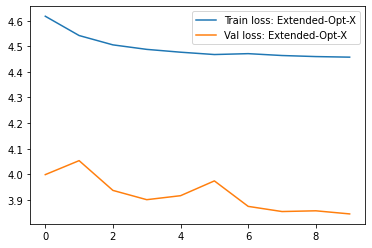

In [ ]:
# Initialize with higher lr
loss_fn = nn.CrossEntropyLoss()
optimizer11 = torch.optim.Adam(model11.parameters(), lr=0.1)
model11, train_losses11, val_losses11 = train_model(model11, loss_fn, optimizer11, train_loader, val_loader, epochs)
torch.save(model11.state_dict(), "Extended-Opt-X.pt")

plt.plot(train_losses11, label = 'Train loss: Extended-Opt-X')
plt.plot(val_losses11, label = 'Val loss: Extended-Opt-X')
plt.legend()
plt.show

In [ ]:
# Extended training for X1
model12 = SoftmaxRegressionOptimized(num_inputs=128, num_classes=num_classes)

# Init weights
for x_batch, y_batch in train1_loader:
  _ = model12(x_batch)
  break

model12.apply(init_model)

SoftmaxRegressionOptimized(
  (net): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): ReLU()
  )
)

Epoch 0 train accuracy: 0.162, validation accuracy: 0.026
Epoch 2 train accuracy: 0.061, validation accuracy: 0.017
Epoch 4 train accuracy: 0.040, validation accuracy: 0.009
Epoch 6 train accuracy: 0.017, validation accuracy: 0.008
Epoch 8 train accuracy: 0.015, validation accuracy: 0.008


<function matplotlib.pyplot.show(*args, **kw)>

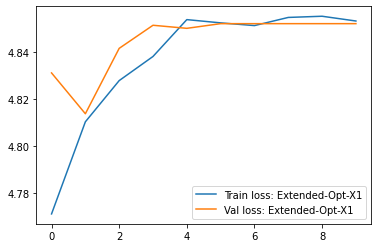

In [ ]:
# Initialize with higher lr
loss_fn = nn.CrossEntropyLoss()
optimizer12 = torch.optim.Adam(model12.parameters(), lr=0.1)
model12, train_losses12, val_losses12 = train_model(model12, loss_fn, optimizer12, train1_loader, val1_loader, epochs)
torch.save(model12.state_dict(), "Extended-Opt-X1.pt")

plt.plot(train_losses12, label = 'Train loss: Extended-Opt-X1')
plt.plot(val_losses12, label = 'Val loss: Extended-Opt-X1')
plt.legend()
plt.show

#Extended results

In [ ]:
# Extended Baseline model on test set X
model7.load_state_dict(torch.load("Extended-X.pt"))
model7.eval()
test_model(model7, test_loader)

Test accurcay: 1.071


In [ ]:
# Extended model on test set X1
model8.load_state_dict(torch.load("Extended-X1.pt"))
model8.eval()
test_model(model8, test1_loader)

Test accurcay: 0.004


In [ ]:
# Extended model on test set Aug-X
model9.load_state_dict(torch.load("Extended-Aug-X.pt"))
model9.eval()
test_model(model9, test_loader)

Test accurcay: 1.289


In [ ]:
# Extended model on test set Aug-X1
model10.load_state_dict(torch.load("Extended-Aug-X1.pt"))
model10.eval()
test_model(model10, test1_loader)

Test accurcay: 1.174


In [ ]:
# Extended model on test set Optimized-X
model11.load_state_dict(torch.load("Extended-Opt-X.pt"))
model11.eval()
test_model(model11, test_loader)

Test accurcay: 0.807


In [ ]:
# Extended model on test set Optimized-X1
model12.load_state_dict(torch.load("Extended-Opt-X1.pt"))
model12.eval()
test_model(model12, test1_loader)

Test accurcay: 0.003


In [ ]:
# for grader use only

# insert grade here  (out of 8)

# G[3] = 
#
# please justify point subtractions when needed

In [ ]:
# total score
max_score = 20
$inal_score = sum(G)*(100/max_score)